# Jetson AGX Xavier Full Shared Memory Range

The following data was collected on the Jetson AGX Xavier. It tests shared memory capacity across intervals of twelfths. This analysis also investigates whether the amount of shared memory used always affects preemption times, or if the shared memory partition set by the compiler is the main factor. The shared memory partition was set by using the cudaFuncSetAttribute function along with the specified carveout percentage. The reason the shared memory capacities are discretized by twelfths is because the loop that maps the shared memory up needs to loop 12 times to address across the full shared memory allocation.

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

shared_directory_path = "SetCapacityData"
shared_paths = []

# List all files in the directory
for filename in os.listdir(shared_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(shared_directory_path, filename)
  if os.path.isfile(file_path):
      shared_paths.append(file_path)
shared_paths = sorted(shared_paths)

# List all files in the no shared directory
# no_shared_directory_path = ''
# for filename in os.listdir(no_shared_directory_path):
#   if filename == '.DS_Store':
#     continue
#   file_path = os.path.join(no_shared_directory_path, filename)
#   if os.path.isfile(file_path):
#       no_shared_file_paths.append(file_path)
no_shared_path = 'Data/saxpyData/cacheConfigData/saxpyPreferL1.csv'

print(shared_paths)
print(no_shared_path)


/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
['SetCapacityData/AxavierSetSharedOne12th.csv', 'SetCapacityData/BxavierSetSharedTwo12th.csv', 'SetCapacityData/CxavierSetSharedThree12th.csv', 'SetCapacityData/DxavierSetSharedFour12th.csv', 'SetCapacityData/ExavierSetSharedFive12th.csv', 'SetCapacityData/FxavierSetSharedSix12th.csv', 'SetCapacityData/GxavierSetSharedSeven12th.csv', 'SetCapacityData/HxavierSetSharedEight12th.csv', 'SetCapacityData/IxavierSetSharedNine12th.csv', 'SetCapacityData/JxavierSetSharedTen12th.csv', 'SetCapacityData/KxavierSetSharedEleven12th.csv', 'SetCapacityData/LxavierSetSharedTwelve12th.csv']
Data/saxpyData/cacheConfigData/saxpyPreferL1.csv


### Load the data

In [2]:
# Load all of the preemption intervals from the shared memory tests into an array 
import numpy as np
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier
shared_ivls_array = []
for shared_path in shared_paths:
  shared_data, shared_ivls = data_loader(singlePath=shared_path, single=True)
  # convert to microseconds
  shared_ivls = np.array(shared_ivls) / 1000
  shared_ivls_array.append(shared_ivls)

# Load in the no shared data
no_shared_data, no_shared_ivls = data_loader(singlePath=no_shared_path, single=True)
no_shared_ivls = np.array(no_shared_ivls) / 1000

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Plot the median intervals

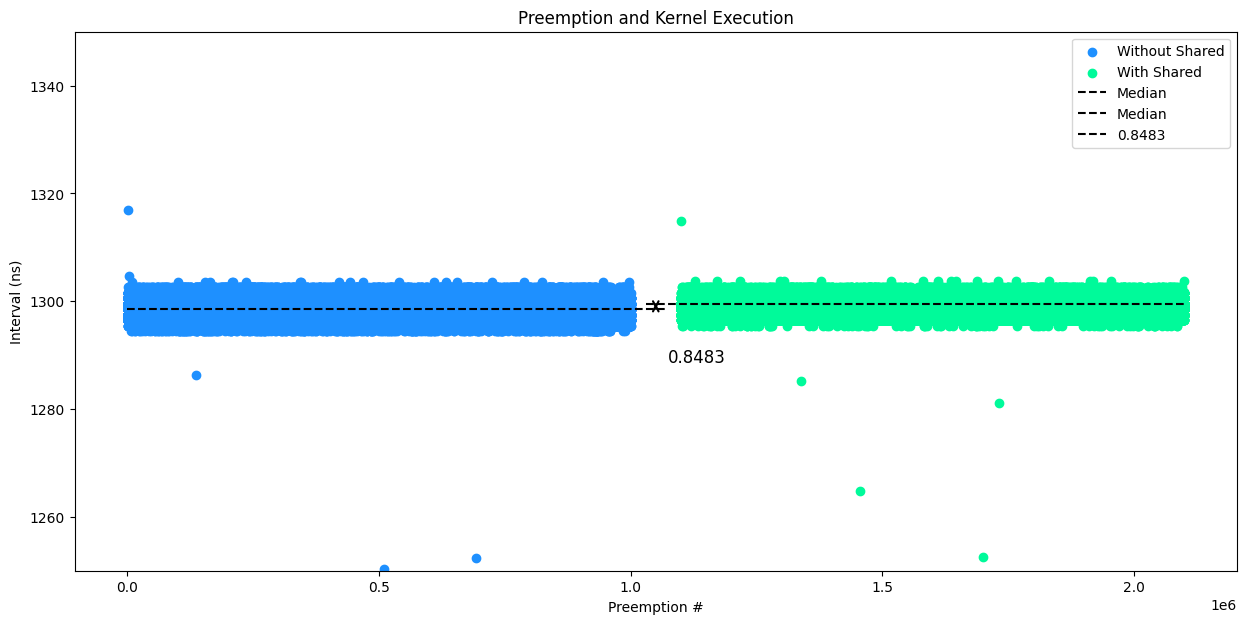

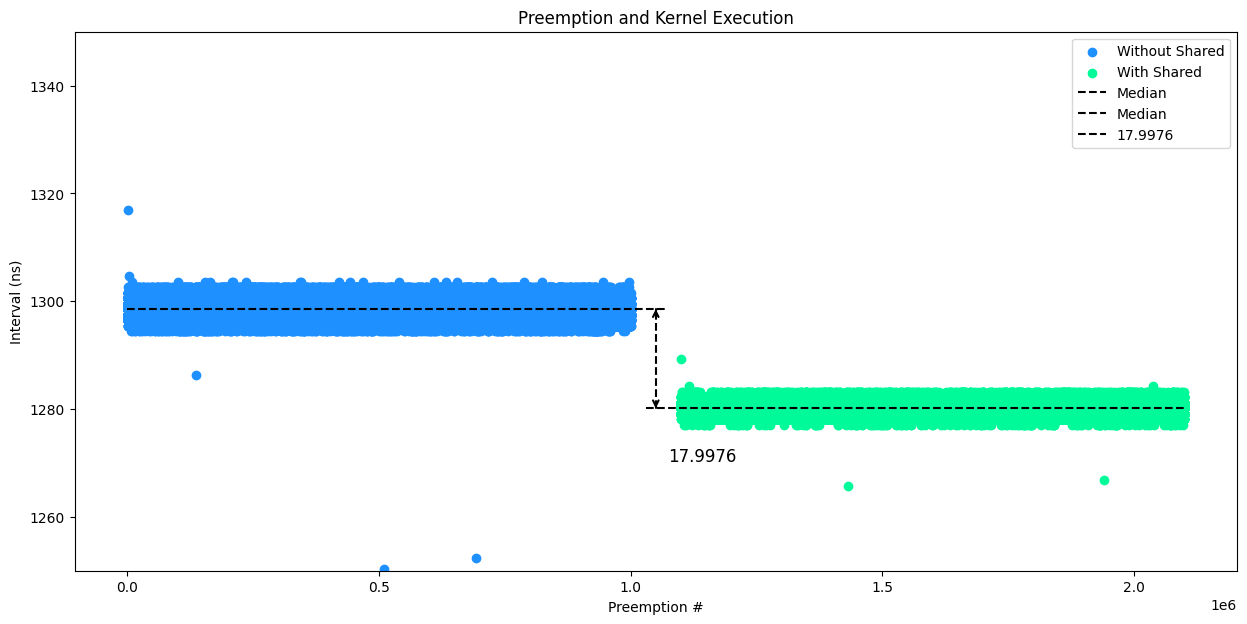

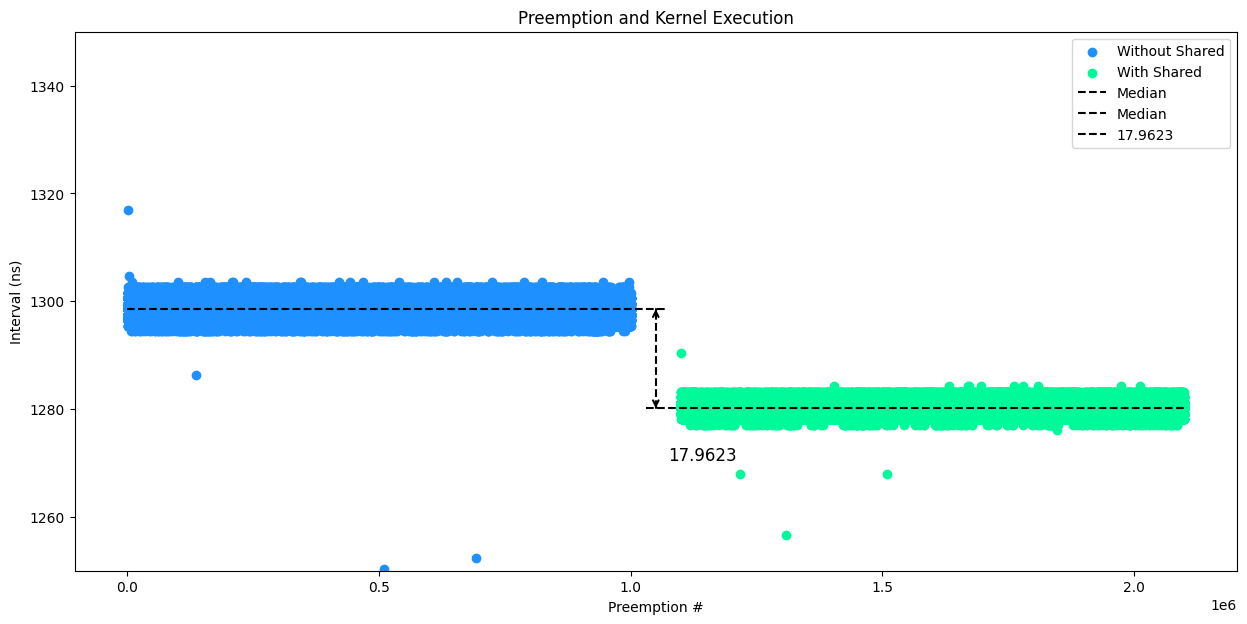

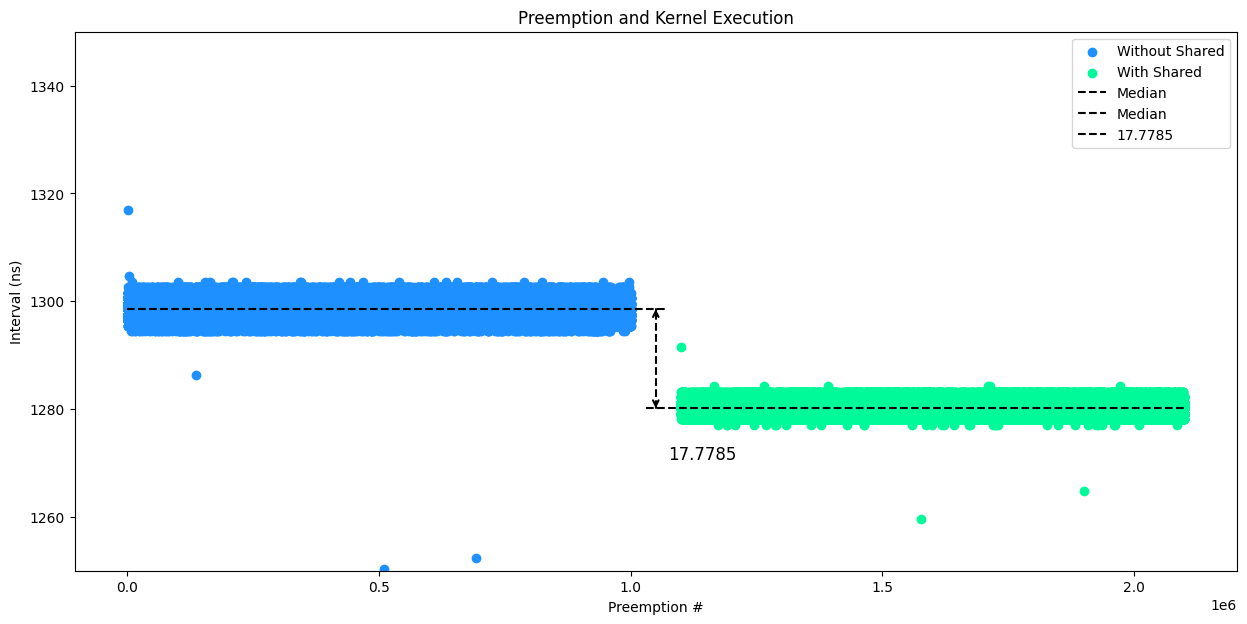

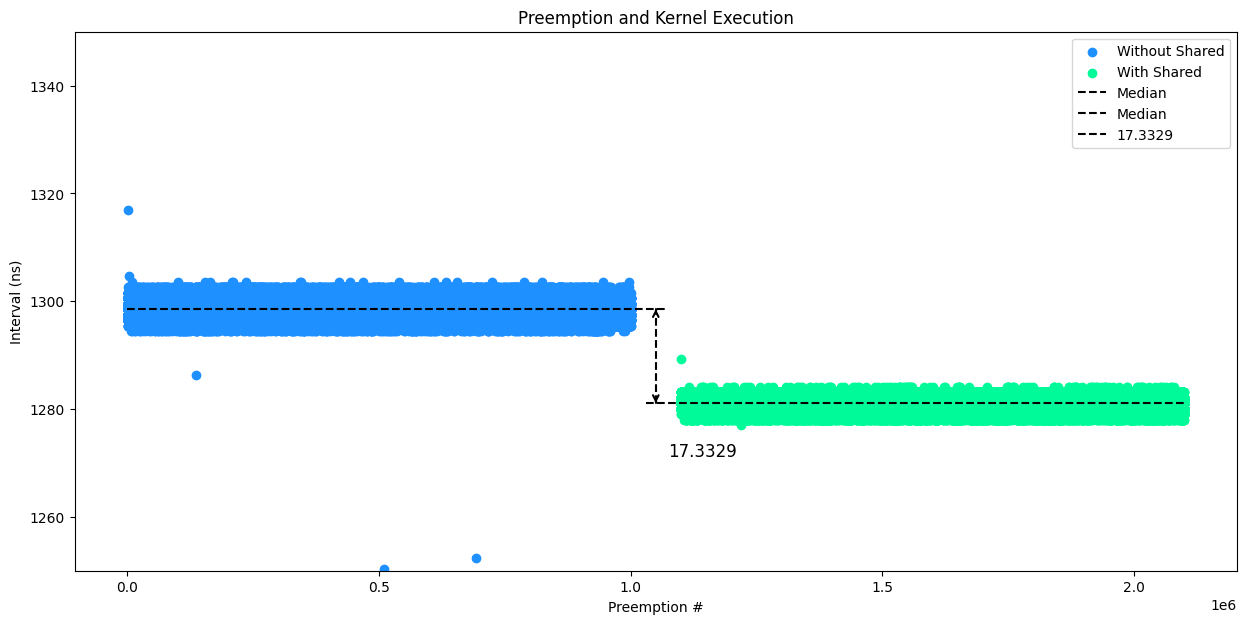

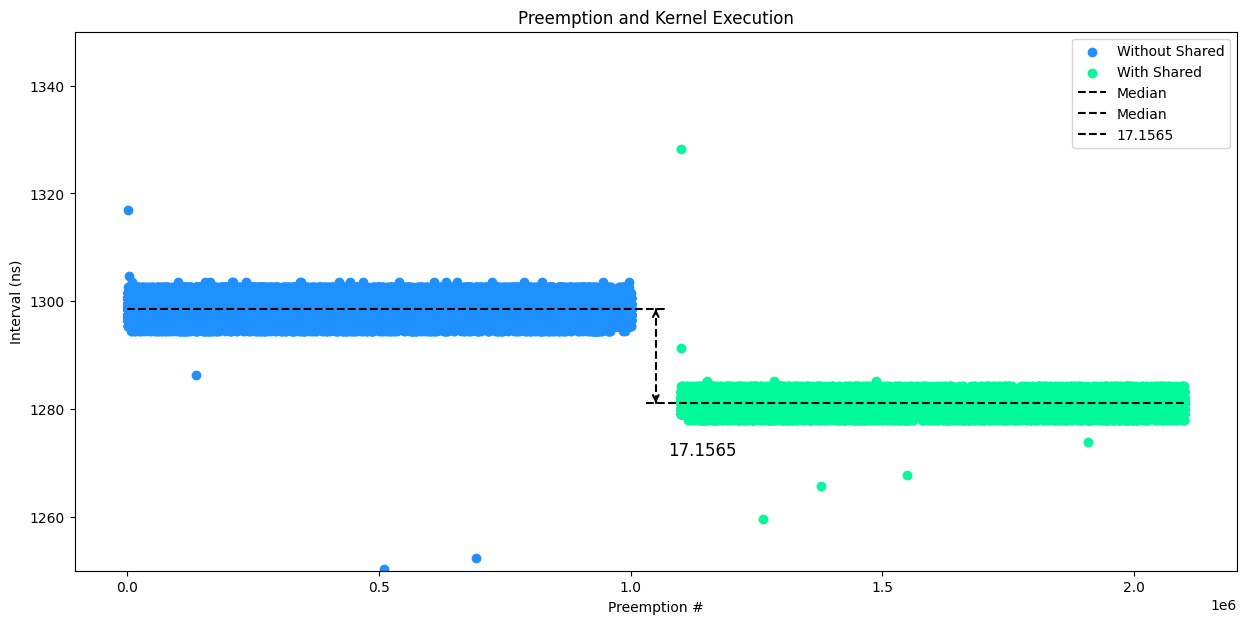

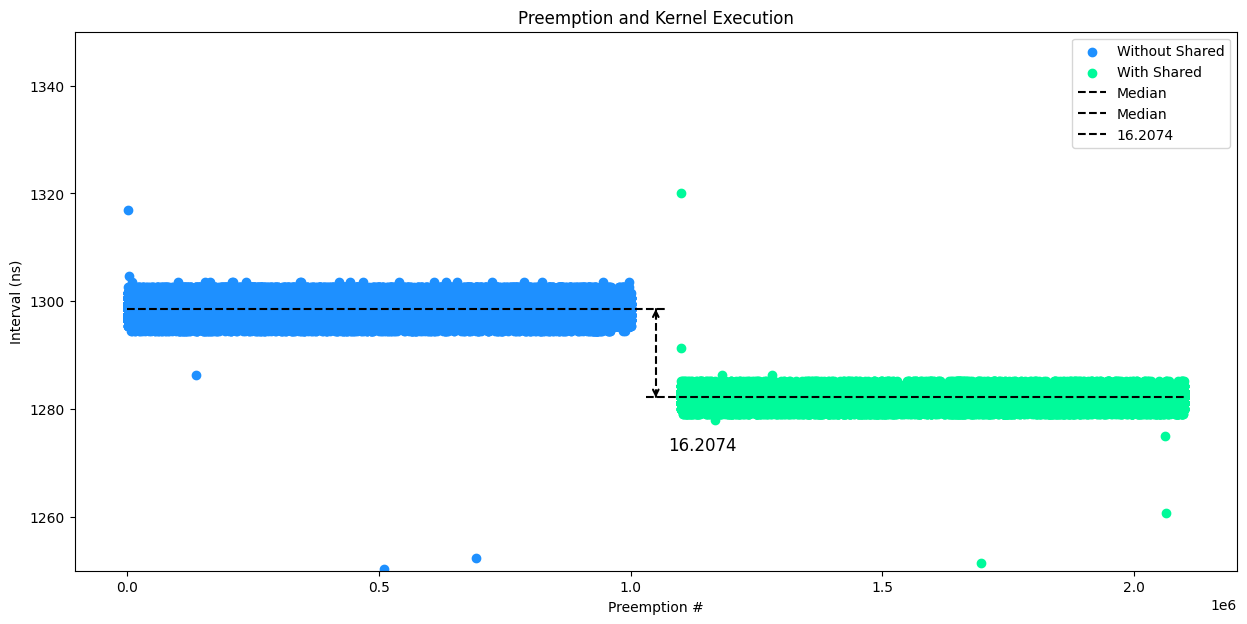

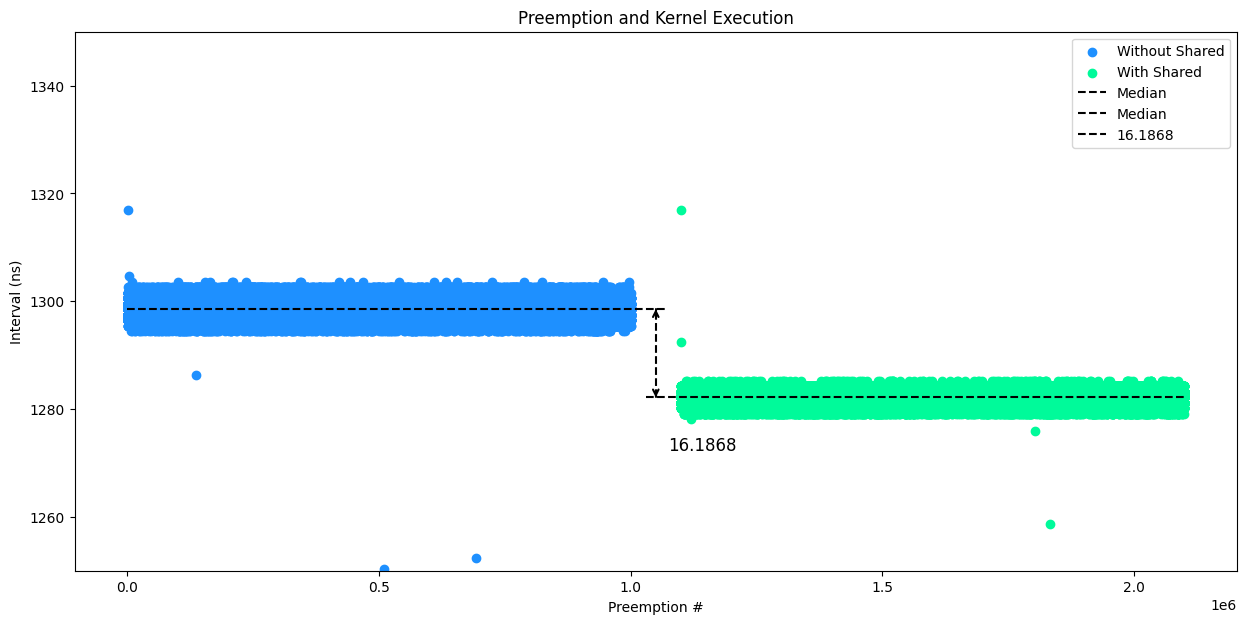

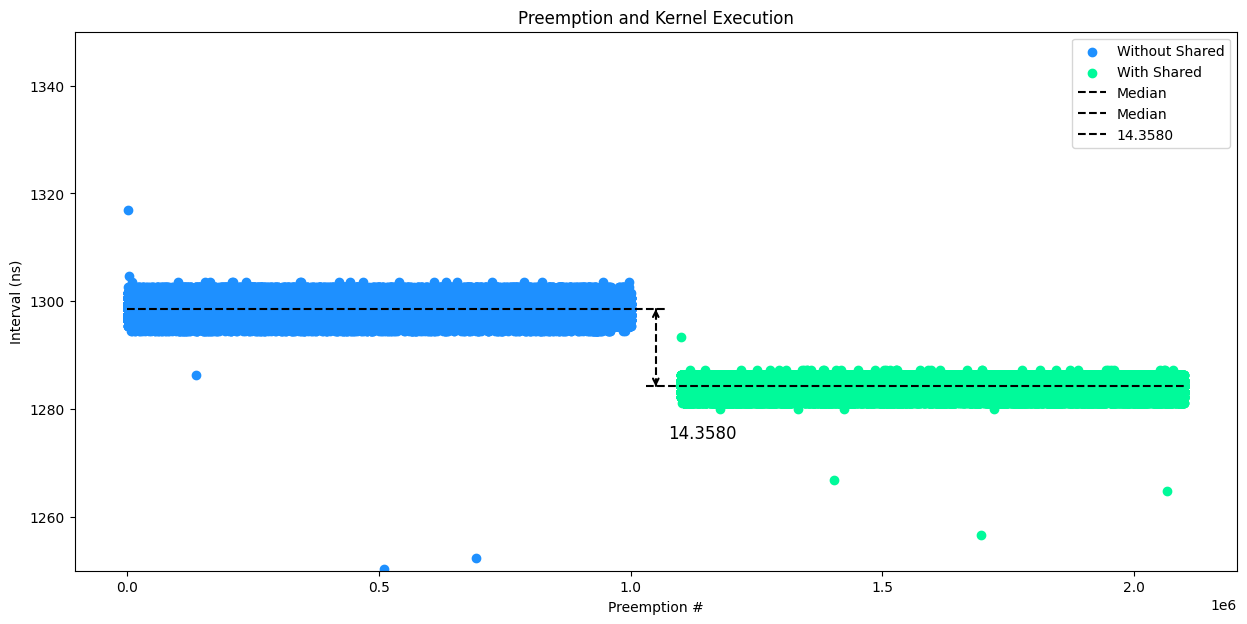

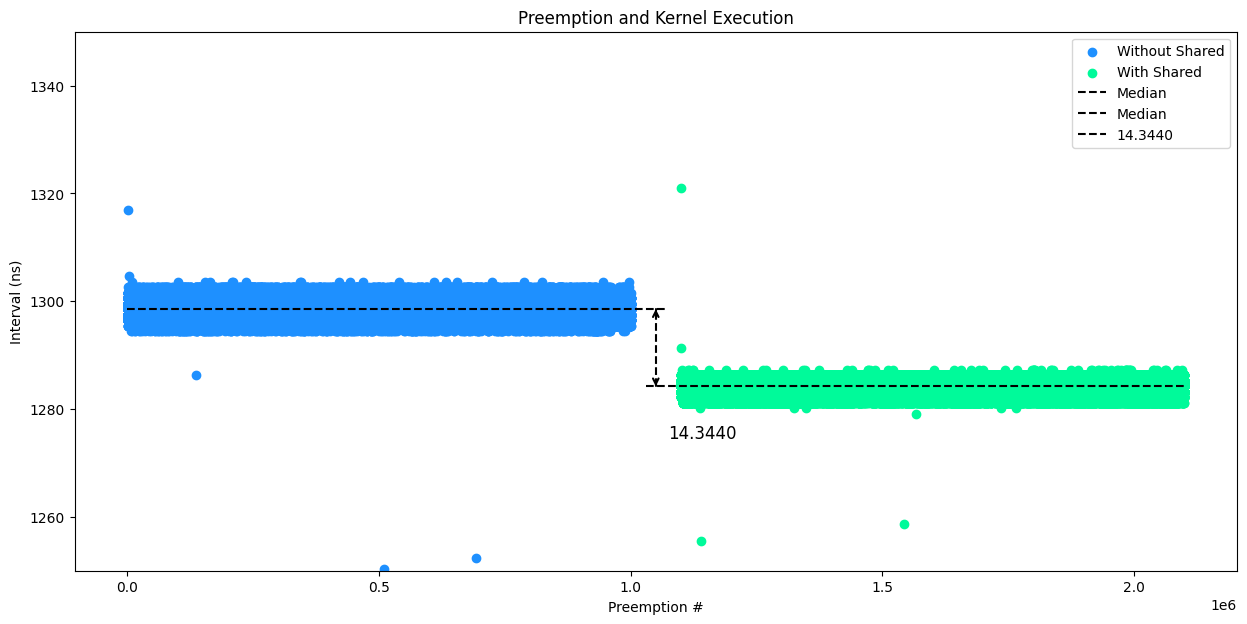

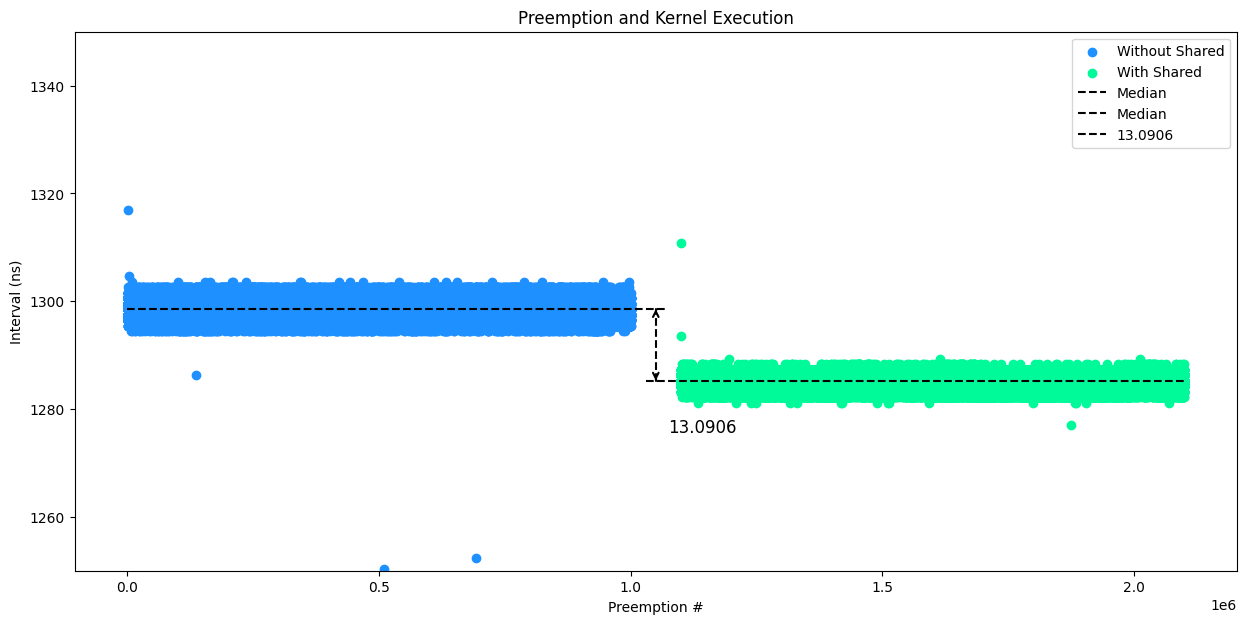

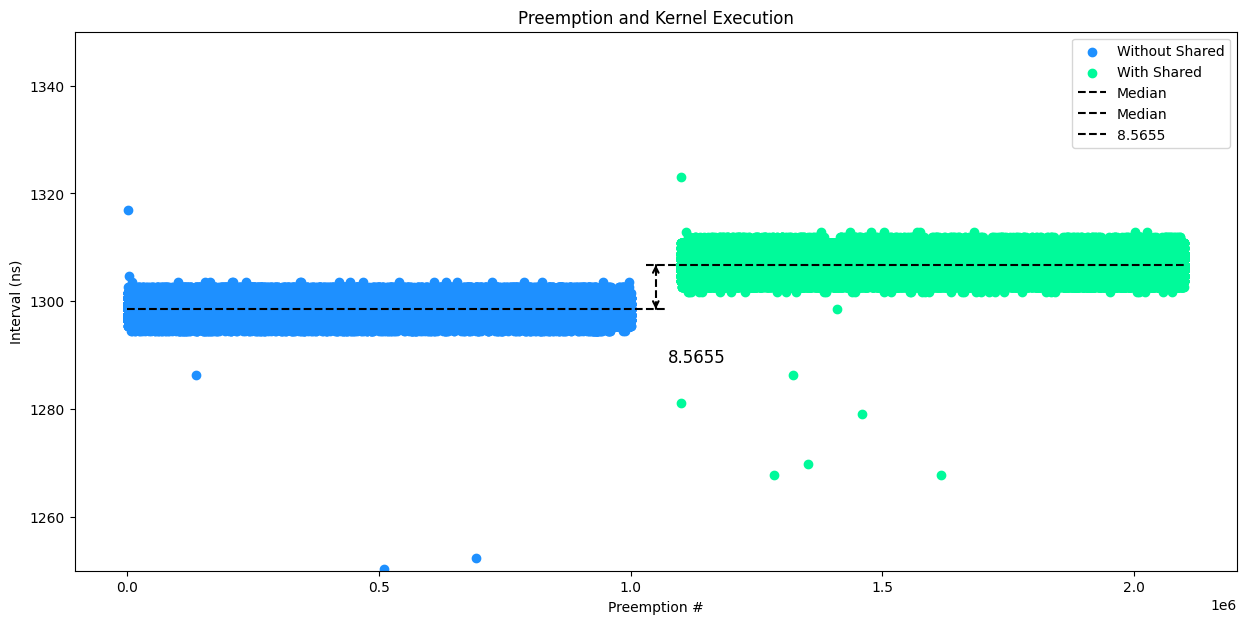

In [3]:
NUM_SAMPLES = 1000000
offset = NUM_SAMPLES // 10
for shared_ivls in shared_ivls_array:
  plot_side_by_side(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=1000000, lowerBound=1.25e3, upperBound=1.35e3, medianLines=True, offset=offset)

In [4]:
# for noSharedPath, sharedPath in zip(no_shared_paths, shared_paths):
  

## Plot all shared memory tests

All shared memory tests will be plotted next to the no shared test that prefers the L1 cache, but does not map the result vector to take up the same amount of space used by the shared memory tests.

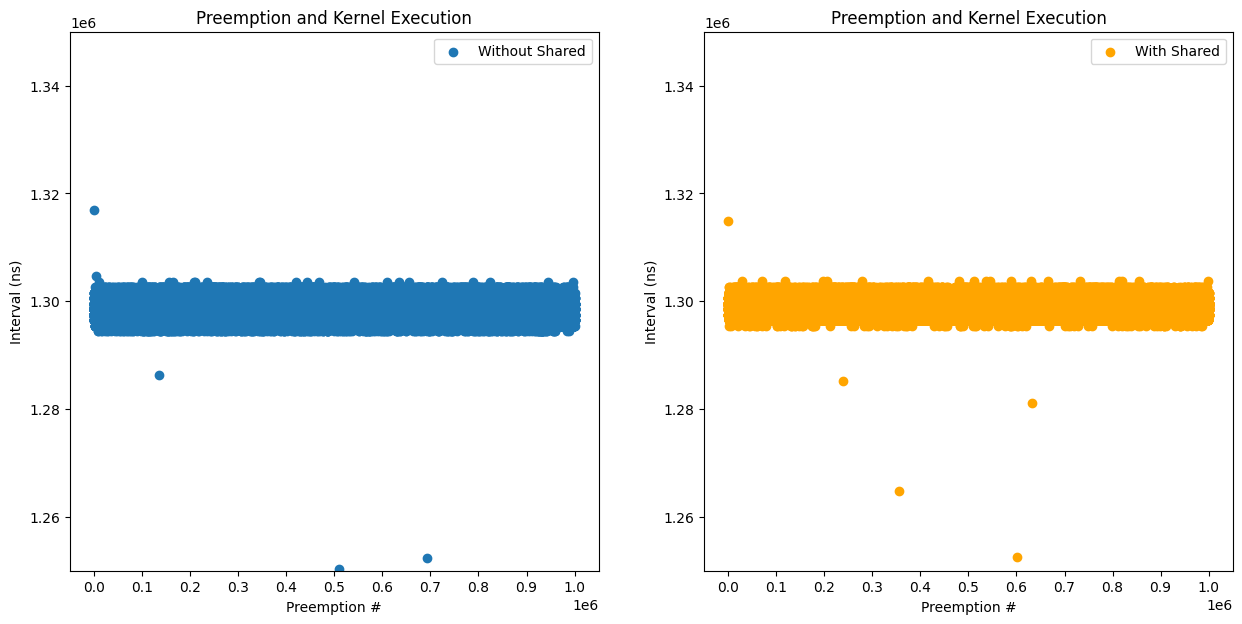

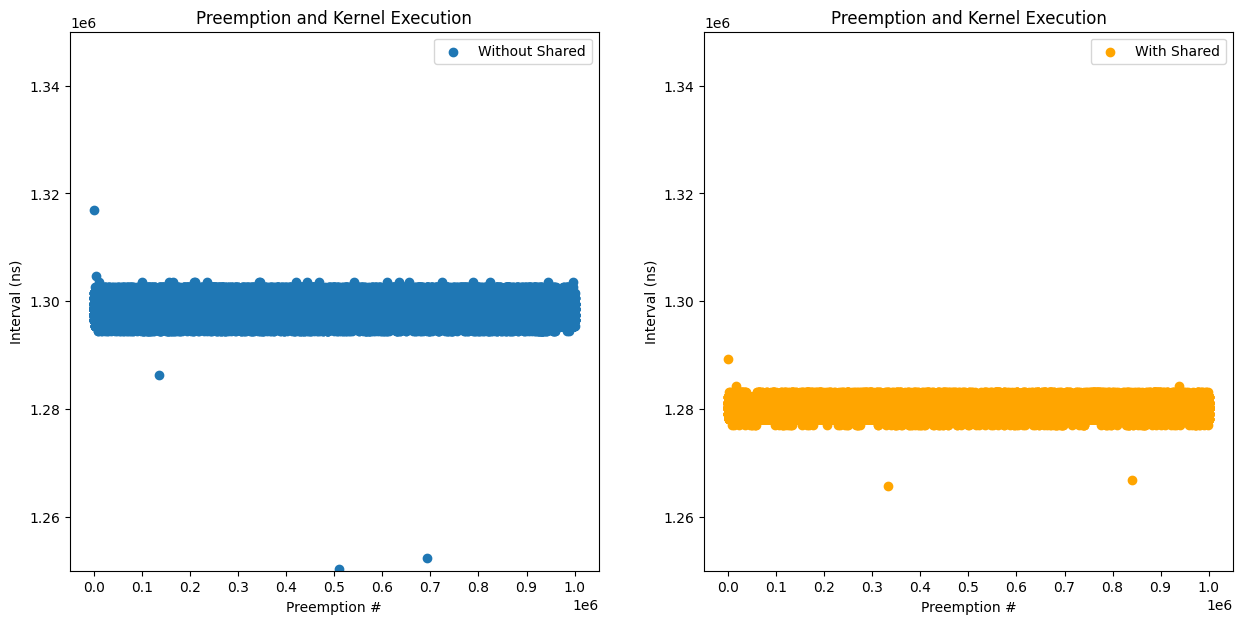

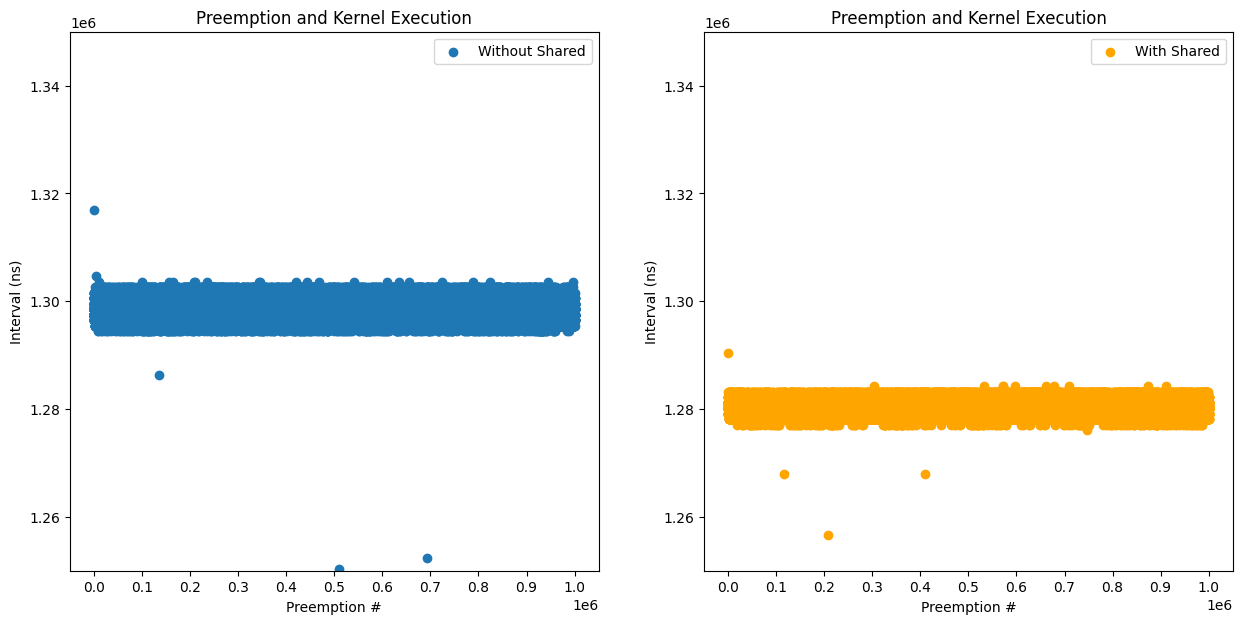

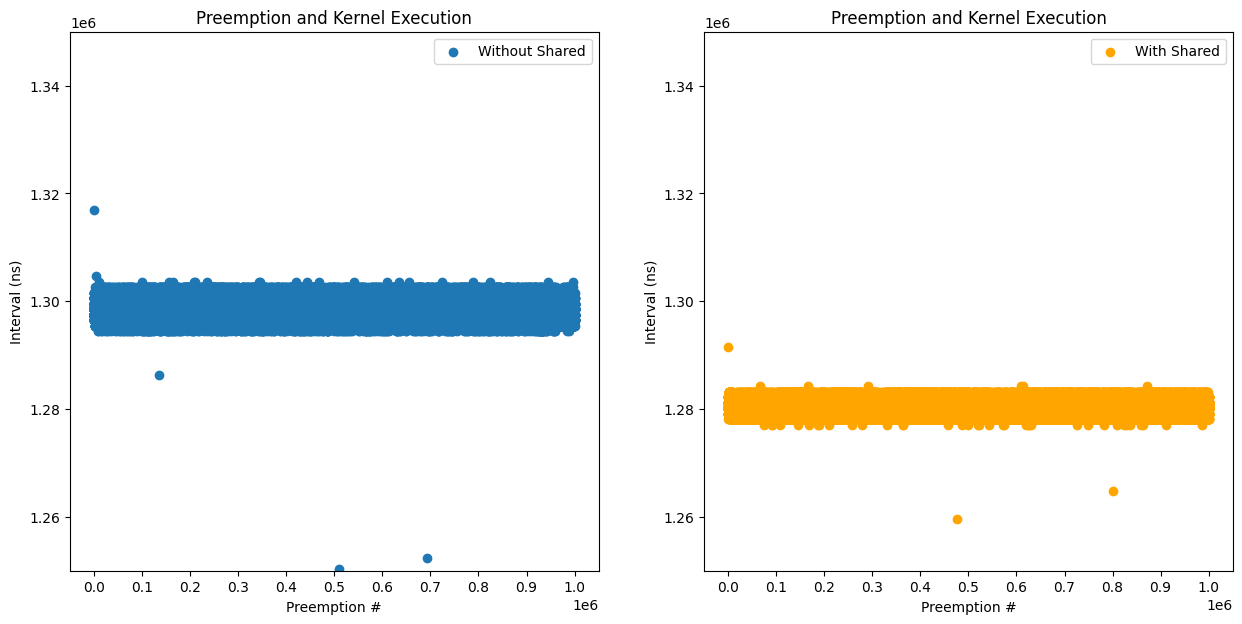

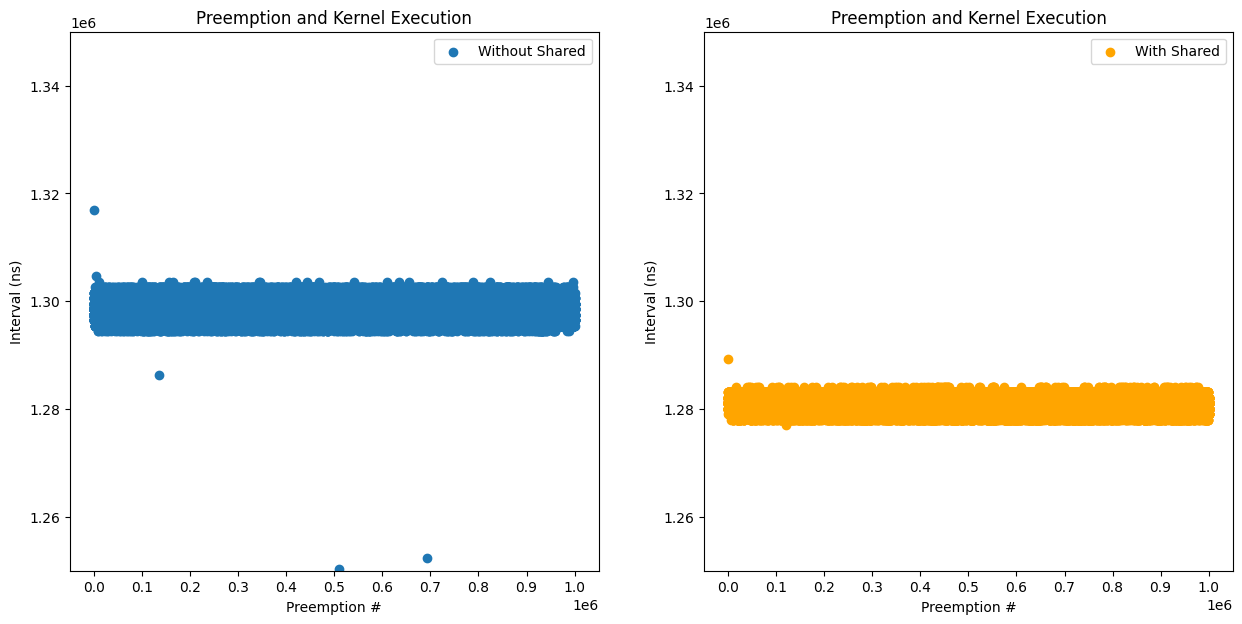

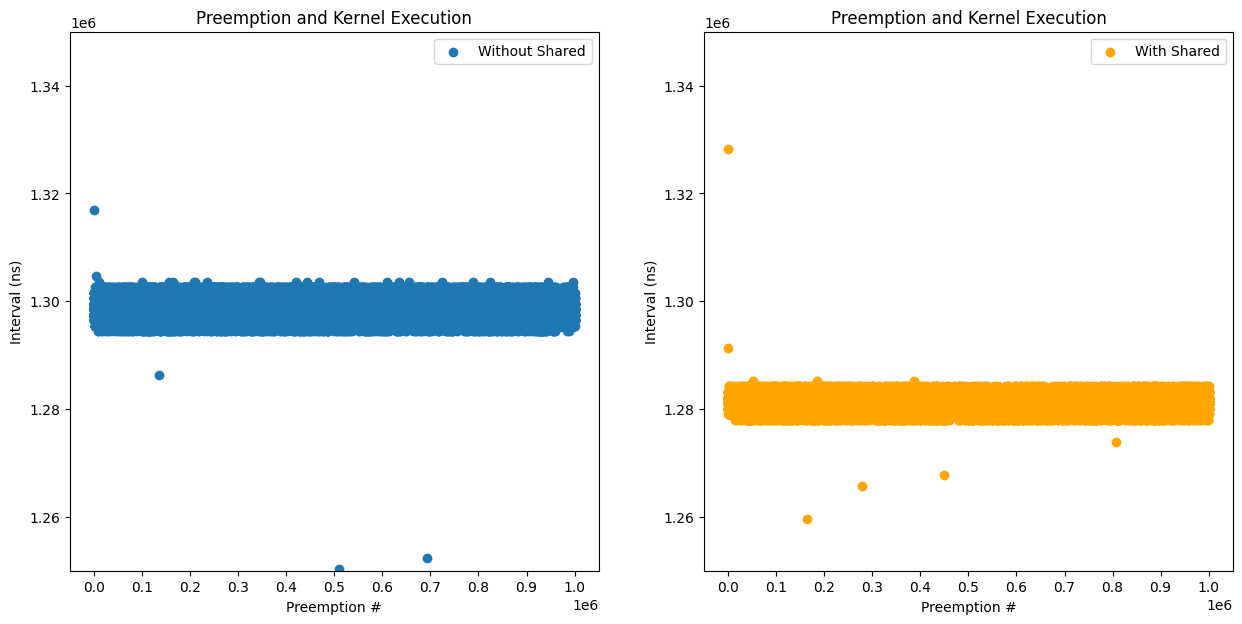

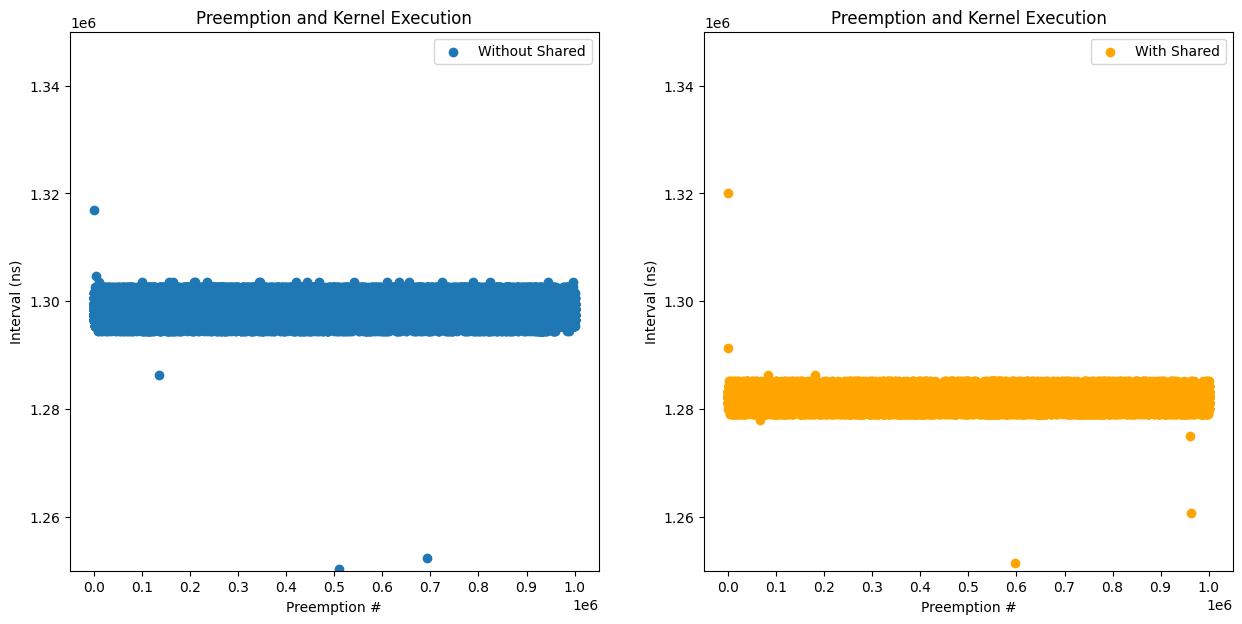

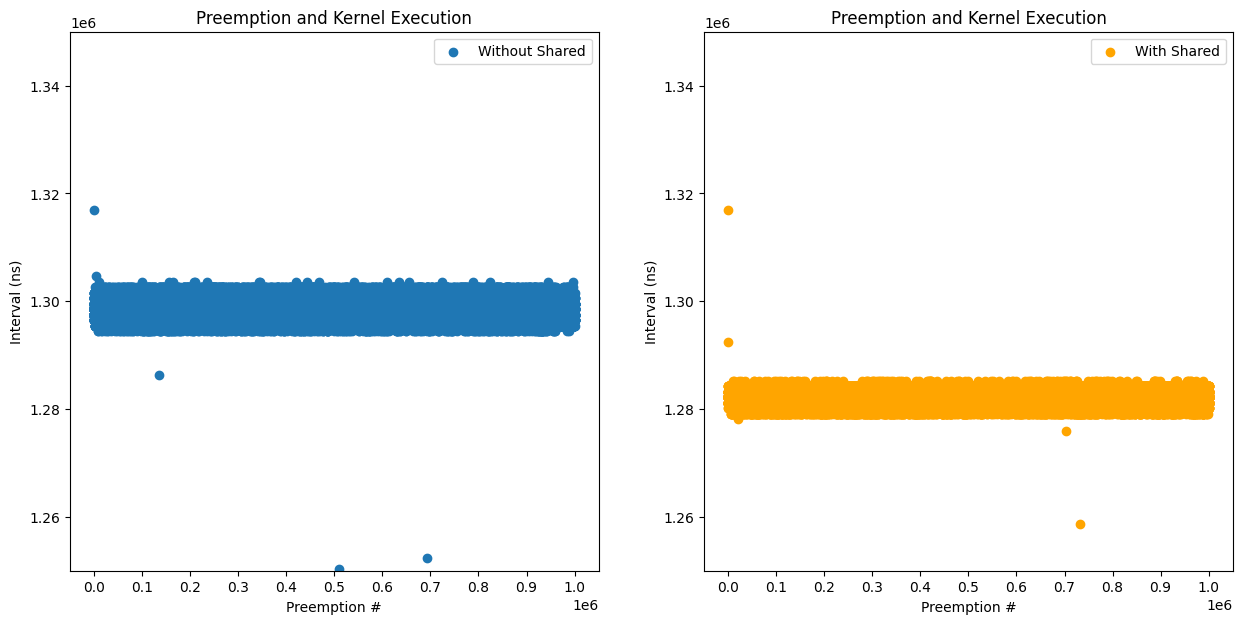

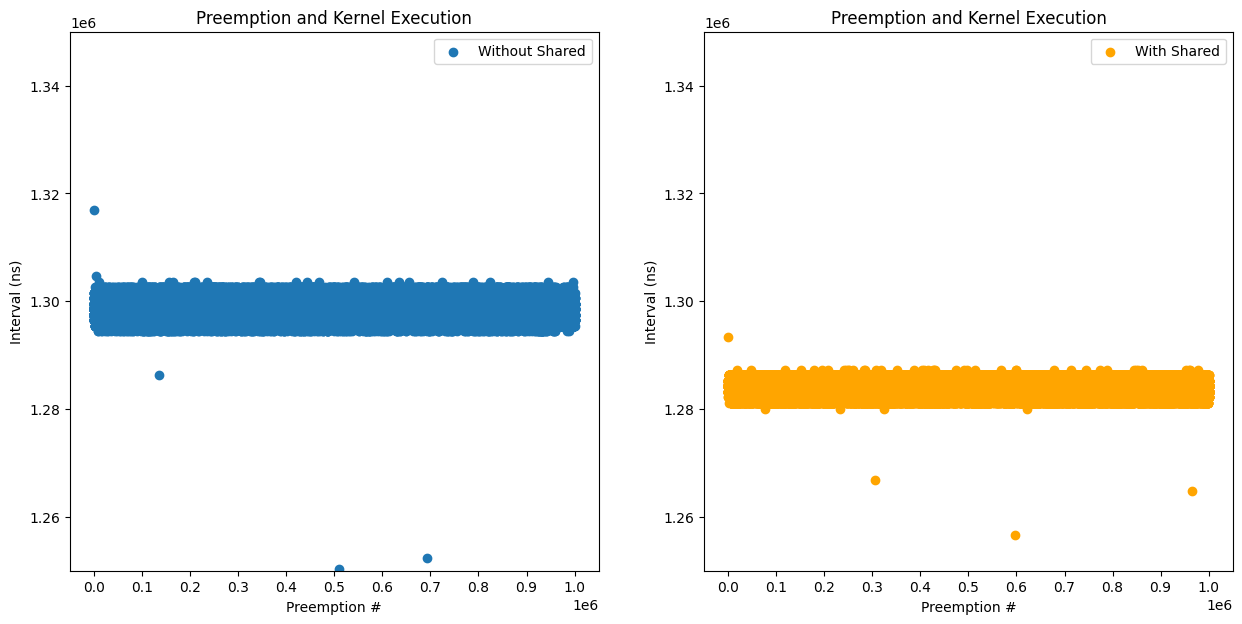

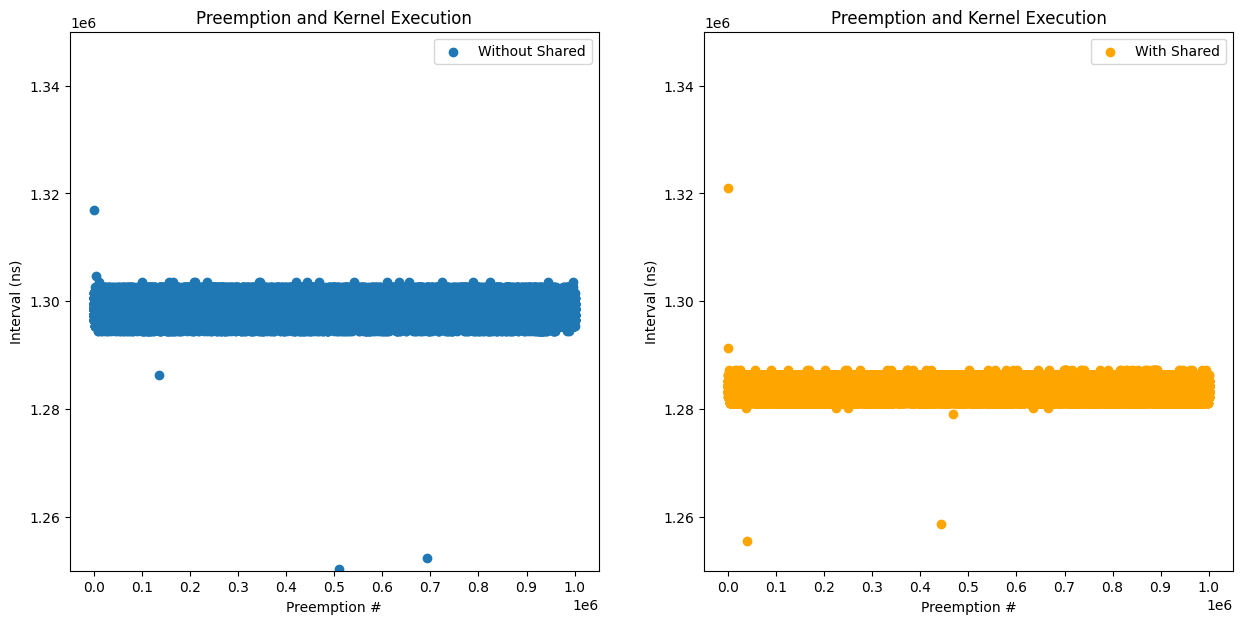

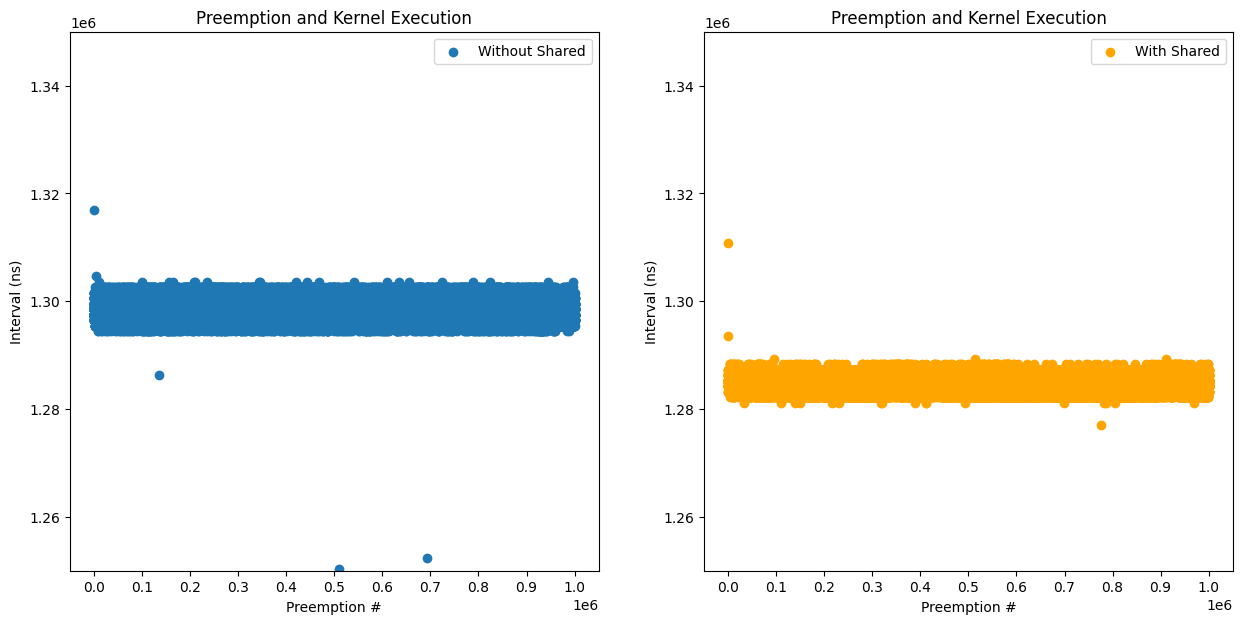

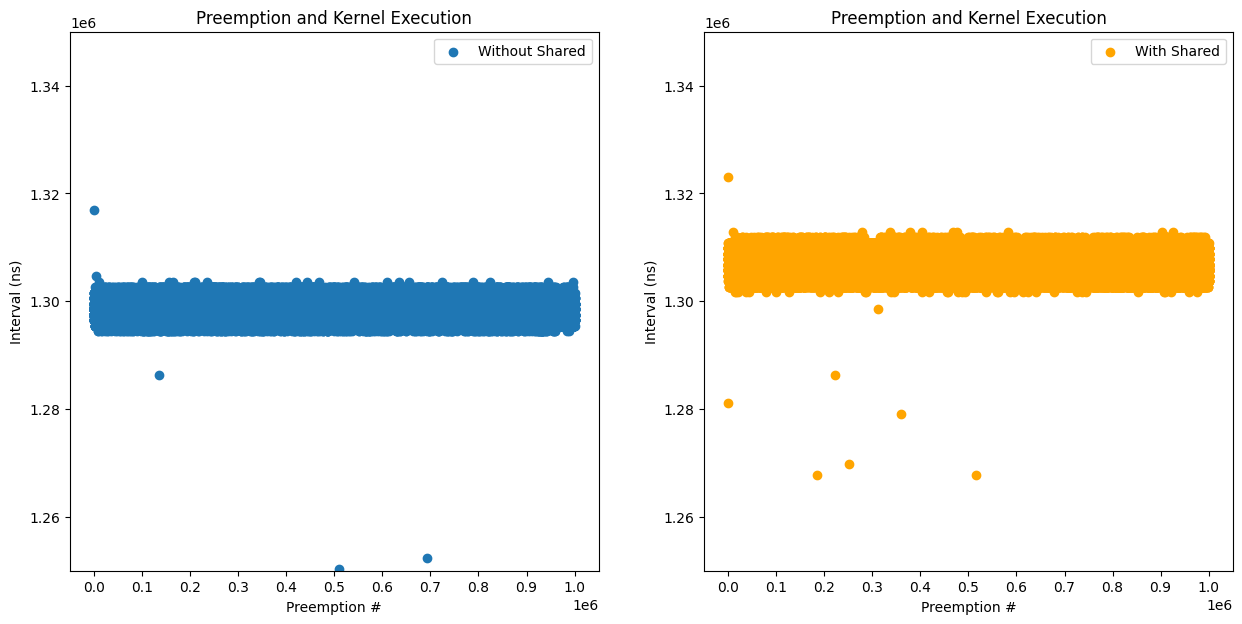

In [5]:
NUM_SAMPLES = 1000000
for shared_ivls in shared_ivls_array:
  plot_separate(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=1000000, lowerBound=1.25e6, upperBound=1.35e6)

## Plot intervals 

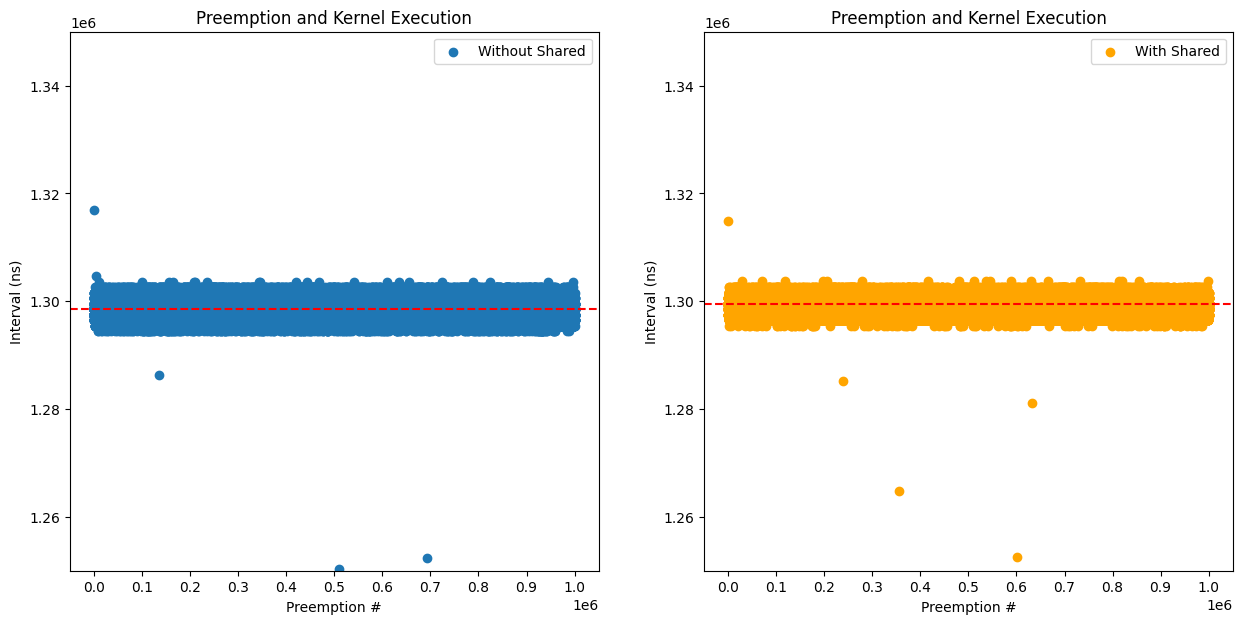

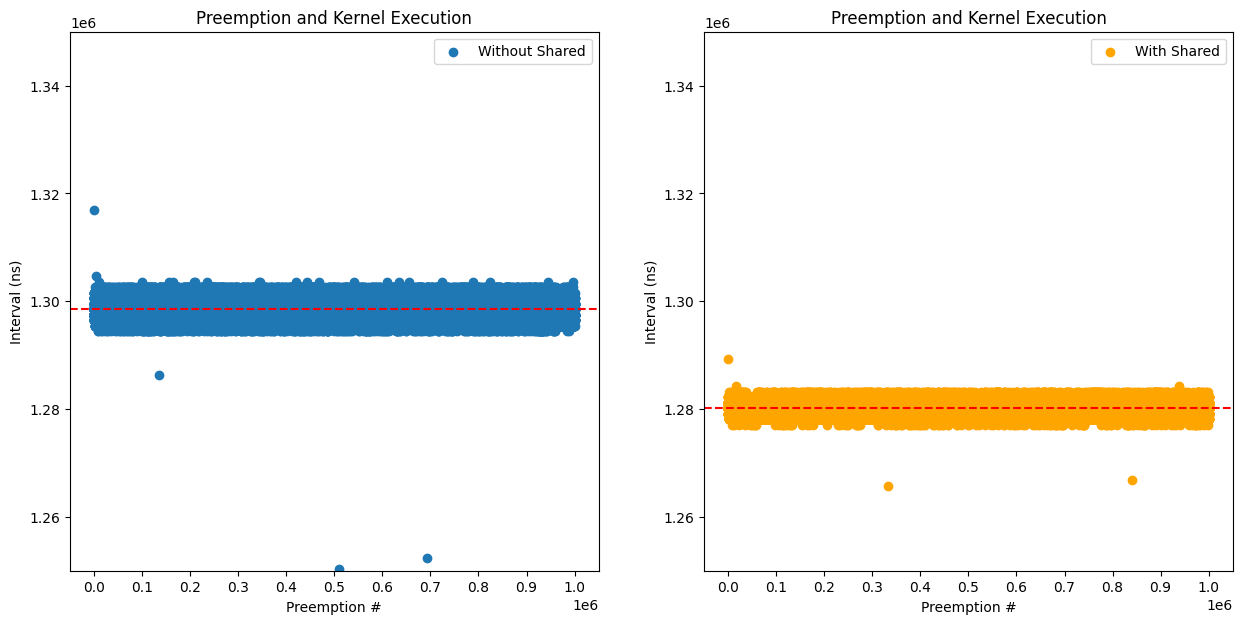

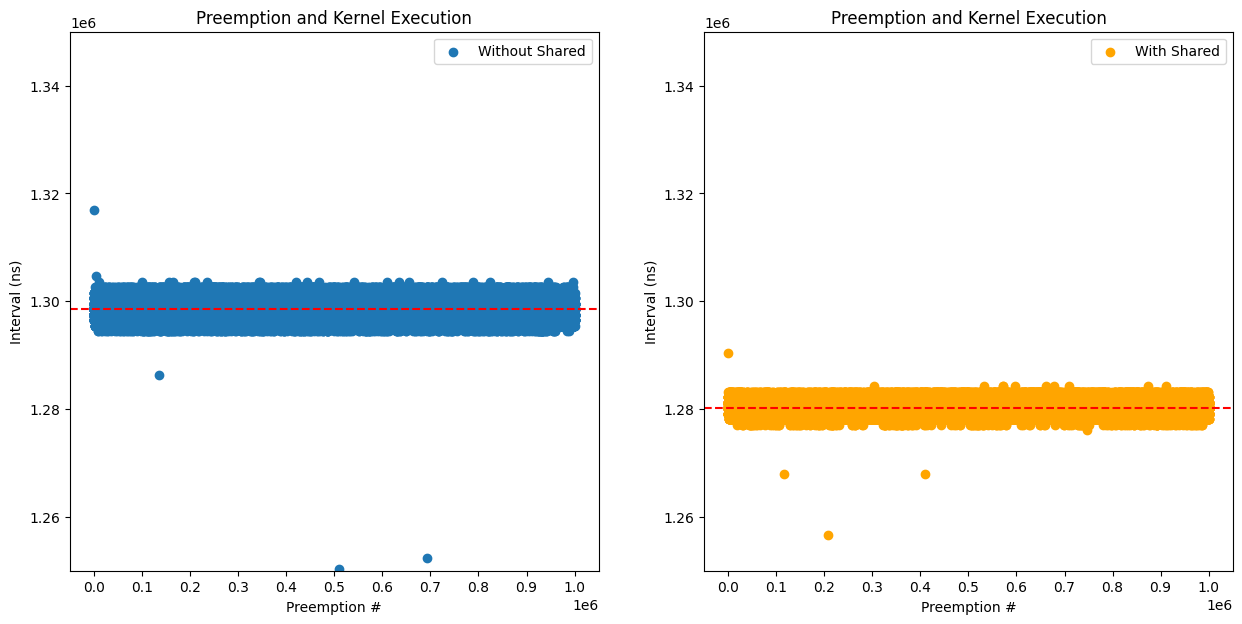

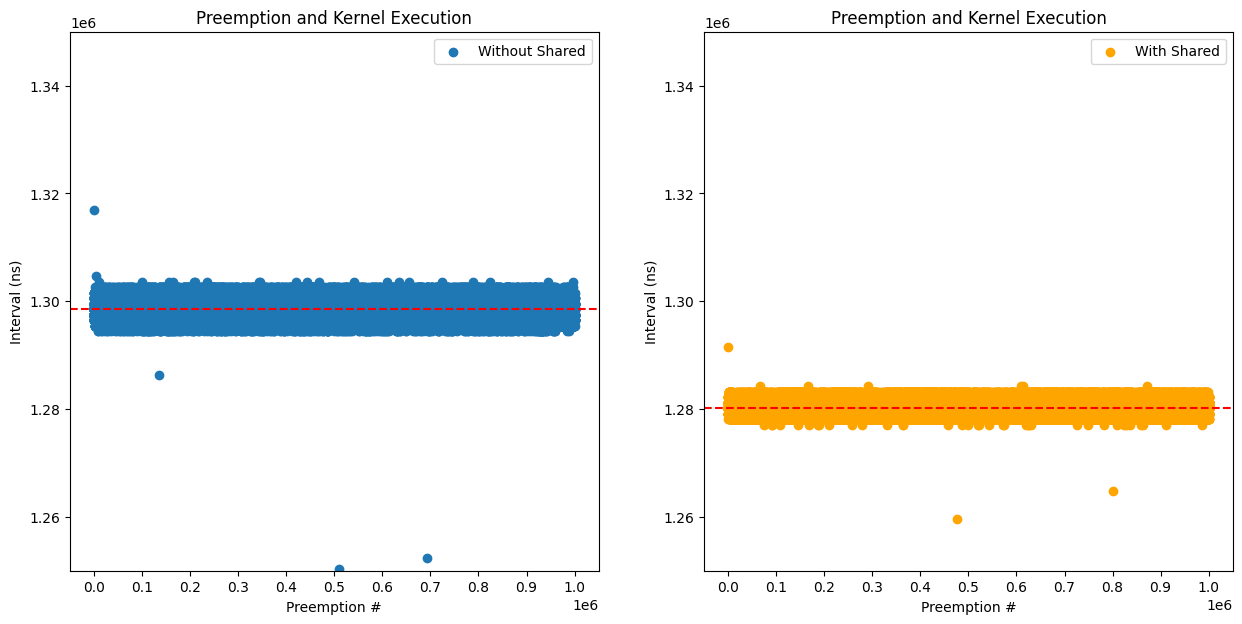

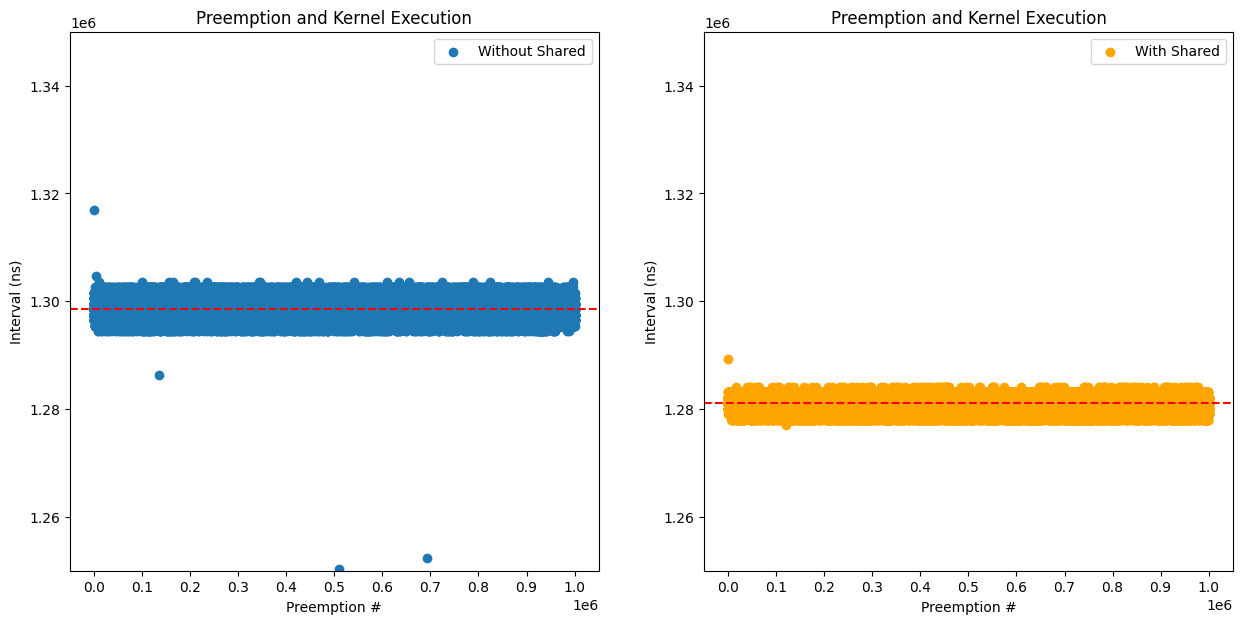

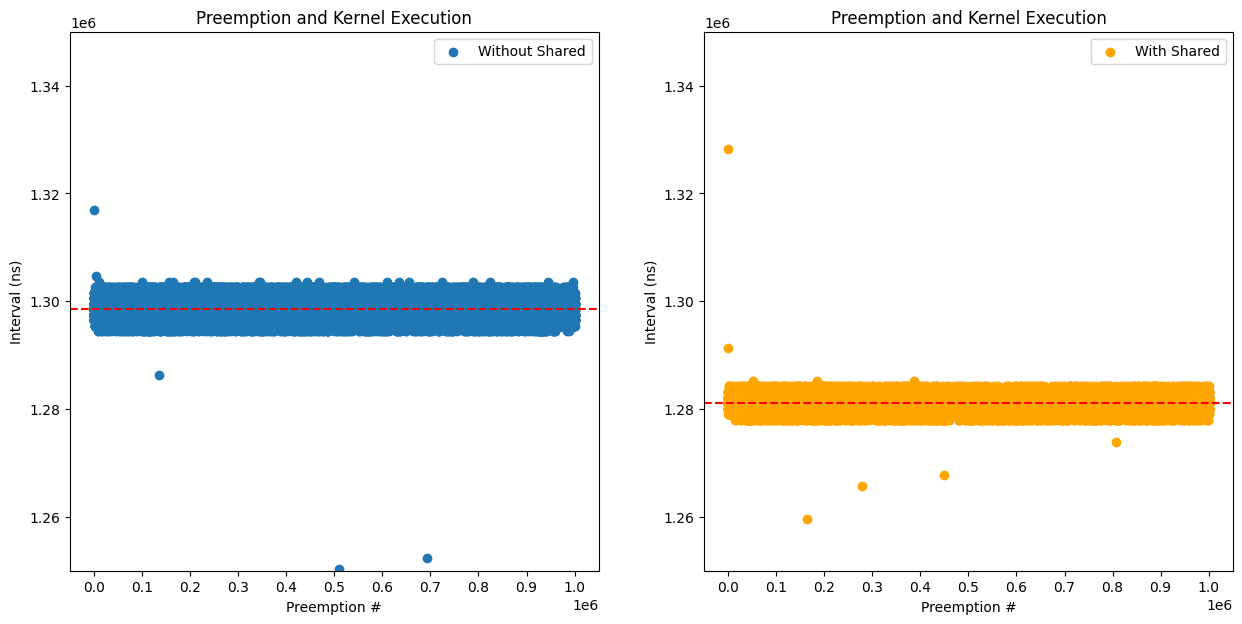

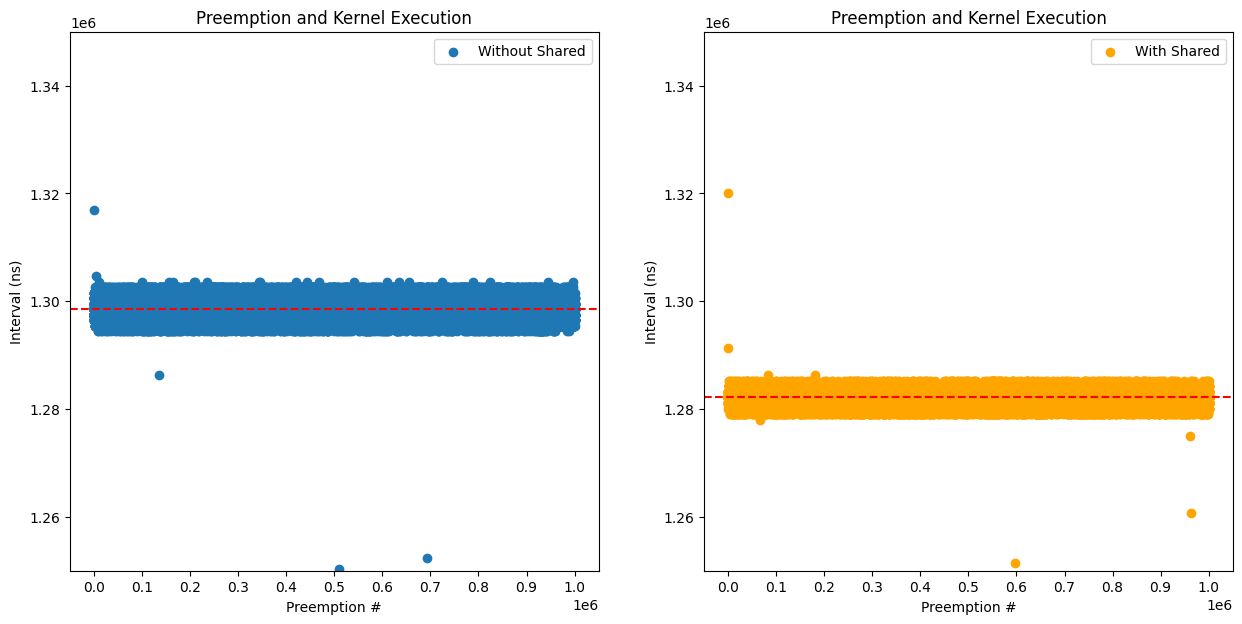

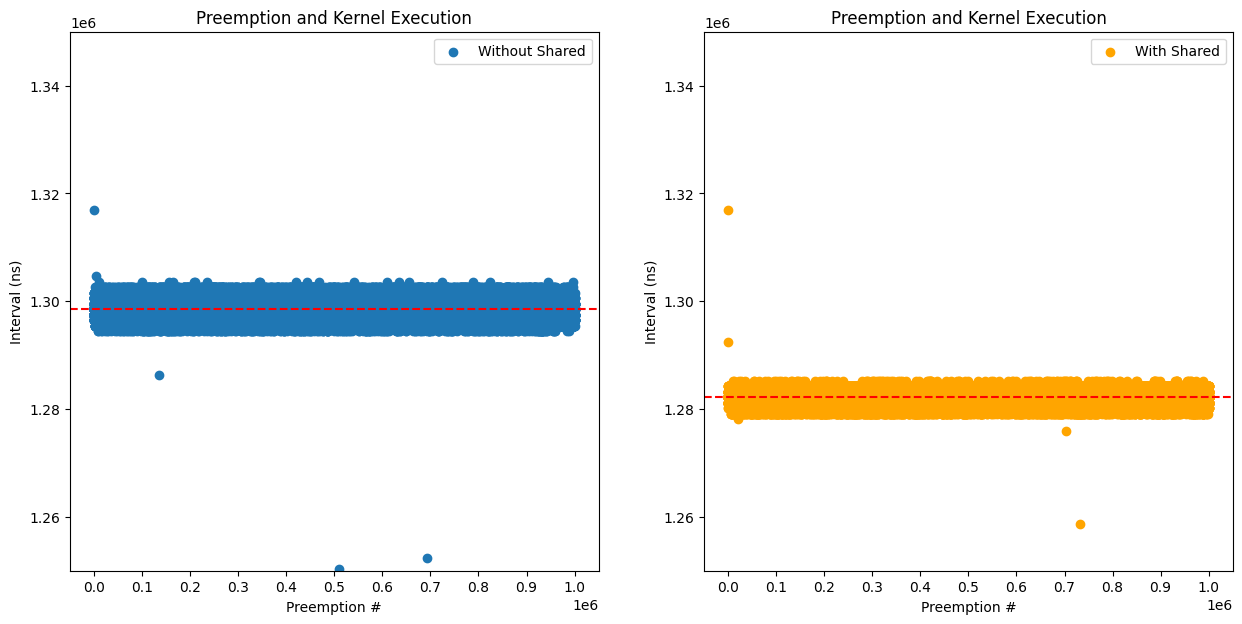

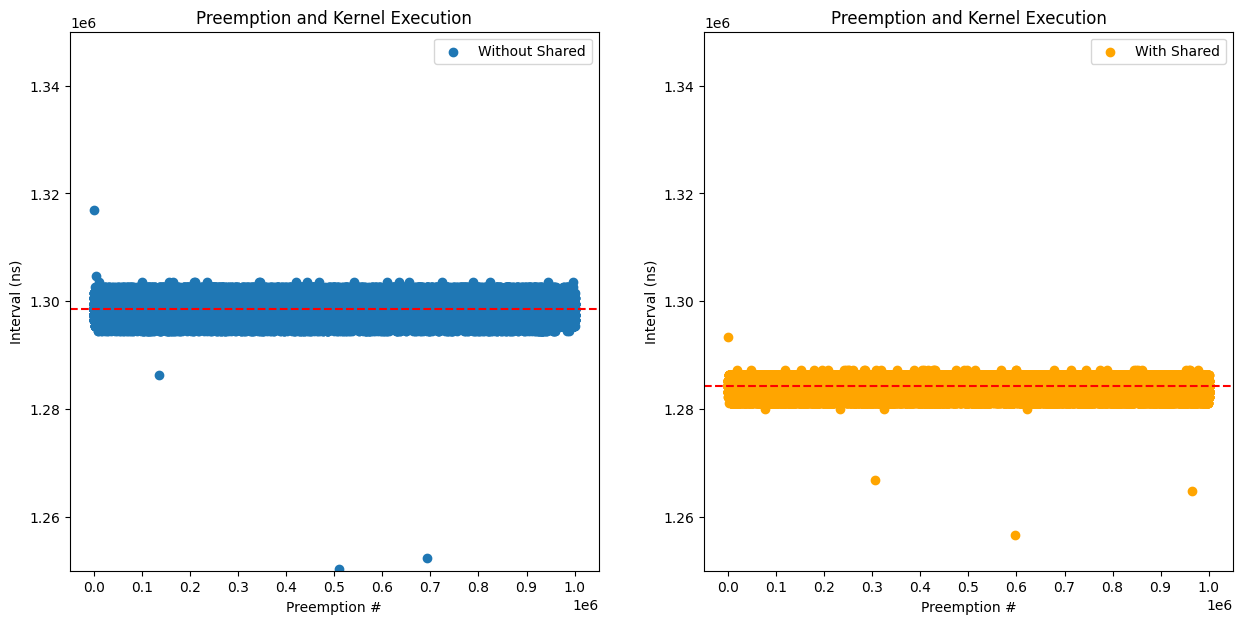

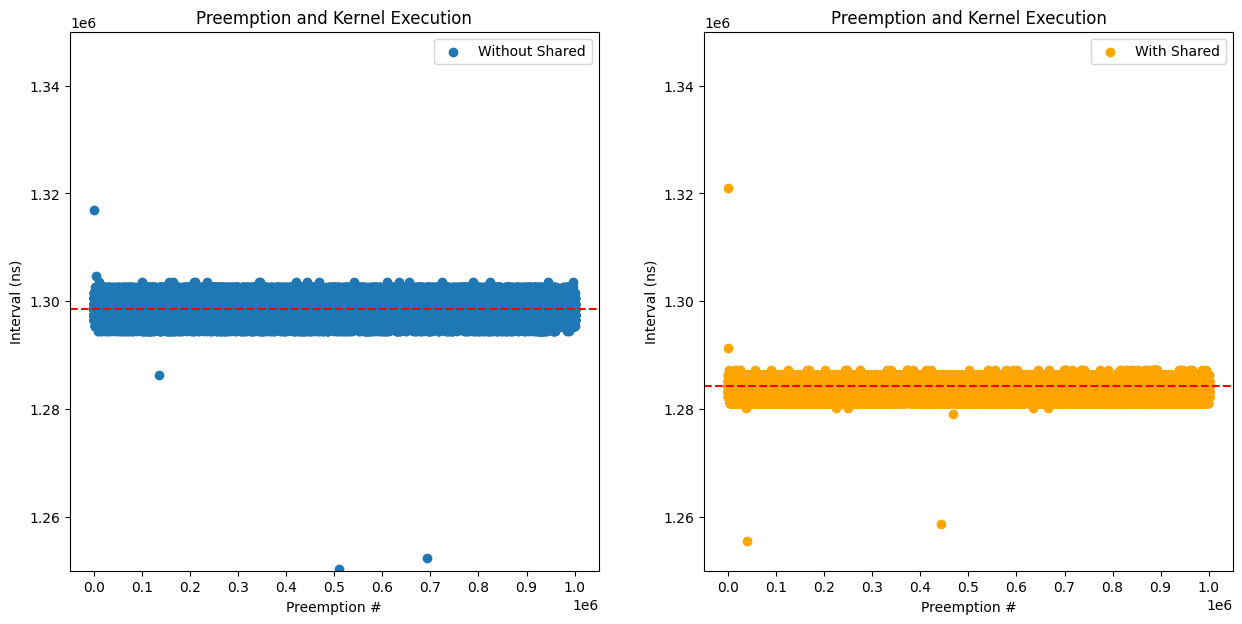

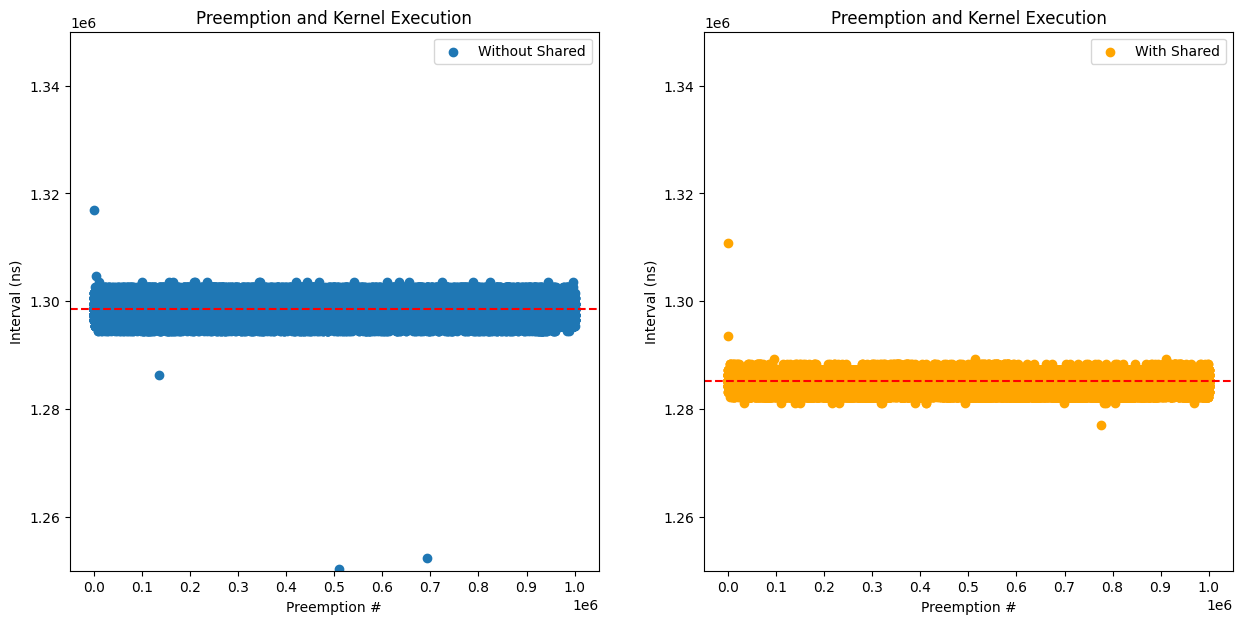

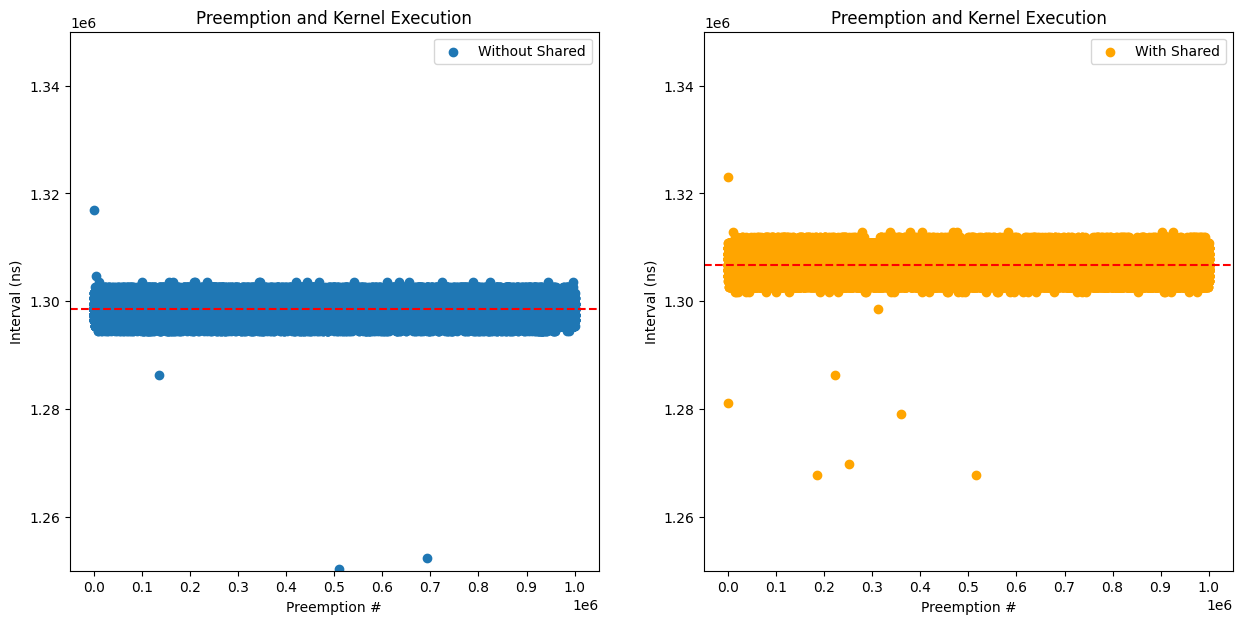

In [6]:
for shared_ivls in shared_ivls_array:
  plot_separate(noSharedData=no_shared_ivls, sharedData=shared_ivls, NUM_SAMPLES=1000000, lowerBound=1.25e6, upperBound=1.35e6, medianLine=True)